<div class="alert alert-block alert-success"><h3>IFN619 - Data Analytics for Information Professionals</h4></div>

## Workshop 02 :: Decision Analysis / Case Studies in Data Analytics

1. Motivation Example



### [1] Motivation: the Analytics Process and Decision Analysis

You have been hired to be the data analyst of the company *Hesiod*, which analyses real estate indicators of different countries. 

Marcel, the CEO of the company, provides you some datasets with financial and economic indicators and asks your opinion about what to expect in the next couple of years in the housing market. Can you help Marcel?

### The Analytics Process

<img src="images/Data Analytics Decision Process.png" />




### Collecting / Loading Data

We will use Python **as a tool** to help us gain some insight about the data and to help us to **answer our business concern**.

The dataset that you need to analyse is in the folder 'data/House_Price_Index_2003_2018.csv'

You can load the data into Python in the following way

In [ ]:
# import the required Python libraries to process the data:
import pandas as pd                # used for data manipulation and data analysis
import matplotlib.pyplot as plt    # used for visualisation

# specify the location and the filenae of your dataset
file_path = 'data/House_Price_Index_2003_2018_v2.csv'   

# load the .csv dataset using the function read_csv, which is part of the pandas library
data = pd.read_csv(file_path)

# We can already have some general information about our dataset by getting 
# the number of rows and columns of the data. For this, we use the *shape* method from Python:
dimensions = data.shape

print( 'General size of the dataset: ' + str( dimensions ))

# and we can extract the number of rows and the number of columns by doing:
num_rows = dimensions[0] # 1st component of the variable dimensions
num_col  = dimensions[1] # 2nd component of the variable dimensions

print('The dataset has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )


We can also display the data so we can see what we are dealing with:

In [ ]:
# we can print the dataset just to check what it contains
print(  data )

**QUESTION:** 
- What do the **rows** and **columns** of this dataset **represent**?


**ANSWER**
- **Rows** represent the **house price index** for each **quarter (date)**.
- **Columns** represent the **house price index** for each **country**

### Clean / PreProcess

We will leavet this step to be exploored in more detail in the next workshop. However, we can still make some interesting questions about this data:

- Q1: What is this dataset about?
- Q2: What are the main problems with this dataset? 
- Q3: Is the data relevant to our initial question (our Business concern)?

**ANSWER:** (Group activity)
- Q1: 
- Q2: 
- Q3:

### Perform Analysis

This dataset describes the **house indexes of different countries in the world**. 

Remeber our question: *what to expect in the next couple of years in the housing market?*

This is a vague question that requires you to **explore** the dataset to get some *insights* about the data.

We can start this process by asking questions:

**Question:** Which countries are in our dataset?

In [ ]:
# the method '.columns' extracts a list with the headings of your dataset
headings = data.columns

for head in headings:   # for each column in the list of columns
    print( head )       # print the data
    

Maybe we can clean this more...

In [ ]:
# selects data from the 2nd position of the list, until the end
countries = headings[2:]
for country in countries:   
    print( country )      
    

**Question:** For how many years has this information been collected?

In [ ]:
# instead of using the 'posiiton' of the data, we can extract it by its column name through
# the method .loc[]
all_dates = data.loc[:, "Date"]

print( all_dates )

We can also clean this more by taking out repeated entries

In [ ]:
# the function unique() removes duplicated entries from the data
dates = all_dates.unique()
print( dates )

**QUESTION:** For how many years has this information been collected?

**ANSWER?**
- Answer here

### Visualization

We can try to visualize our data to get some more insights. We can plot the house price indexes of Australia from 2003 to 2018. But for that... we need to process data again...

We need to eliminate the *Quarter* dimension of our data by grouping the data by Date (which represents the year). This is performed by making the **average** of the **house price indexes** of each **country** for **ALL QUARTERS** and **aggregating** the results **by year**. In Python, one can do this using the function *.groupby and the aggregation of the data is done by computing the **mean**.
The following figure shows an example.

<img src='images/groupBy.png' />


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group data records from Australia and UK by DATE in order to have data in the format:
# 2003 price_2003
# 2004 price_2004 ...
# This way, we are removing the Quarter column from our representation
AU_house_price_indx = data.groupby('Date')['Australia'].mean()
UK_house_price_indx = data.groupby('Date')['United Kingdom'].mean()

# Compute the overall average of the house prices in Australia and in UK
AU_house_price_indx_avg = data['Australia'].mean()
# Display the results as a list instead of a single value
print( 'The avarage house price index in Australia is ' + str(round(AU_house_price_indx_avg,4)) )

# Convert to a format where you will have the average house price as a list
# We need this for plotting reasons
lst = np.ones(num_col - 1, float)
AU_house_price_indx_avg = round( data['Australia'].mean(), 4)*lst
print('\nAverage house prices in a list format: you repeat this value for all the years (for plotting purposes) ')
print( AU_house_price_indx_avg )

# Compute the average of house prices for UK and represent the results as a list
UK_house_price_indx_avg = data['United Kingdom'].mean()*lst



In [ ]:
fig = plt.figure()
plt.subplot(2, 1, 2)
plt.plot( AU_house_price_indx, label='Australia')   # House prices per year in AU
plt.plot( dates, AU_house_price_indx_avg )          # Overall average of house price indx in AU
plt.ylabel('HPI')
plt.title('Australia House Price Index (HPI)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.subplot(2, 1, 2)
plt.plot(UK_house_price_indx, label='United Kingdom')  # House prices per year in UK
plt.plot(dates, UK_house_price_indx_avg)               # Overall average of house price indx in UK
plt.ylabel('HPI')
plt.title('United Kingdom House Price Index (HPI)')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

**Question** Are there similarities between the house price indexes in UK with Australia?

**ANSWER**

In [ ]:
# visualize data
plt.plot(UK_house_price_indx)
plt.plot(AU_house_price_indx)
plt.ylabel('HPI')
plt.title('United Kingdom vs Australia House Price Index (HPI)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
#Select UK house price indexes from 2003 - 2010
UK_house_price_03_10 = UK_house_price_indx[0:8] 
#Select UK house price indexes from 2003 - 2010
UK_house_price_08_18 = UK_house_price_indx[6:]  

#Select AU house price indexes from 2003 - 2010
AU_house_price_03_10 = AU_house_price_indx[0:8]  
#Select AU house price indexes from 2008 - 2018
AU_house_price_08_18 = AU_house_price_indx[6:] 


In [ ]:
# visualize data
plt.subplot(2, 1, 2)
plt.plot(UK_house_price_03_10)
plt.plot(AU_house_price_03_10)
plt.ylabel('HPI')
plt.title('HPI UK vs AU (2003 - 2010)')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

plt.subplot(2, 1, 2)
plt.plot(UK_house_price_08_18)
plt.plot(AU_house_price_08_18)
plt.ylabel('HPI')
plt.title('HPI UK vs AU (2010 - 2018)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

**Group Activity**
- Q1: Can you explain the exponential growth of house prices in UK between 2003 - 2007?
- Q2: Why house prices started to drop in UK between 2007 - 2014?
- Q3: What happened to the housing sector in Australia
    - Q3.1. Before 2007:
    - Q3.2. Between 2007 - 2010
    - Q3.3. Between 2010 - 2013
    - Q3.4. After 2014


**OUTCOME OF GROUP ACTIVITY**
- Q1:
- Q2:
- Q3:
    - Q3.1.
    - Q3.2.
    - Q3.3.
    - Q3.4.

### Try it yourself! Goup Activity###

It is interesting to analyse the housing market in different sets of countries: 
- Southern European countries: Portugal, Spain, Italy, Greece
- Northen European countries: Sweden, Finland, Norway 
- Major European powers: Germany, France, UK
- USA vs UK

Plot three graphs, showing these three sets of contries in different plots. Interpret the data.

In [ ]:
# SOUTHERN EUROPE ANALYSIS

# Group data by year | country
group_col = ???
PT_house_price_indx = data.groupby(group_col)[???].mean()  # Portugal
SP_house_price_indx = data.groupby(group_col)[???].mean()  # Spain
IT_house_price_indx = data.groupby(group_col)[???].mean()  # Italy
GR_house_price_indx = data.groupby(group_col)[???].mean()  # Greece

# Plot results
plt.plot(IT_house_price_indx[3:])
plt.plot(GR_house_price_indx)
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.ylabel('HPI')
plt.title('Italy vs Greece House Price Index (HPI)')
plt.show()

plt.plot(PT_house_price_indx)
plt.plot(SP_house_price_indx[5:])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Portugal vs Spain House Price Index (HPI)')
plt.show()


### Insert here your interpretations of the graphs
1. ???
2. ???
3. ???

In [ ]:
# The Case of Ireland and Iceland

# Group data by year | country
group_col = ???
IR_house_price_indx = data.groupby(group_col)['Ireland'].mean()  # Ireland
IC_house_price_indx = data.groupby(group_col)['Iceland'].mean()  # Iceland

# Plot results
plt.subplot(2, 1, 2)
plt.plot(IR_house_price_indx)
plt.plot(IC_house_price_indx[2:])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Ireland vs Iceland House Price Index (HPI)')
plt.show()



### Insert here your interpretations of the graphs
1. ???
2. ???
3. ???

In [ ]:
# NORTHERN EUROPE ANALYSIS

# Group data by year | country
group_col = ???
SW_house_price_indx = data.groupby(group_col)[???].mean()   # Sweden
NOR_house_price_indx = data.groupby(group_col)[???].mean()  # Norway
FIN_house_price_indx = data.groupby(group_col)[???].mean()  # Finland

# Plot results
plt.plot(SW_house_price_indx[2:])
plt.plot(NOR_house_price_indx[2:])
plt.plot(FIN_house_price_indx)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Northern Europe Countries House Price Index (HPI)')
plt.show()

### Insert here your interpretations of the graphs
1. ???
2. ???
3. ???

In [ ]:
# MAIN EUROPE POWERS ANALYSIS

# Group data by year | country
group_col = ???
GE_house_price_indx = data.groupby(group_col)[???].mean()   # Germany
FR_house_price_indx = data.groupby(group_col)[???].mean()   # France

# Plot results
plt.plot(GE_house_price_indx)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Germany House Price Index (HPI)')
plt.show()

# Plot results
plt.plot(FR_house_price_indx)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('France House Price Index (HPI)')
plt.show()

### Insert here your interpretations of the graphs
1. ???
2. ???
3. ???

In [ ]:
# Group data by year | country
USA_house_price_indx = data.groupby(???)[???].mean()   # United States of America

# Plot results
plt.plot(USA_house_price_indx)         # USA
plt.plot(UK_house_price_indx)          # UK
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('USA vs UK House Price Index (HPI)')
plt.show()

### Insert here your interpretations of the graphs
1. ???
2. ???
3. ???

### Final Discussion ###
What do you think it will happen in the next couple of years in the housing sector? What is the trend in Australia? Is there a pattern from past data when we compare with other countries?

1. ans1 
2. ans2
3. ans3


### The Impact of Interest Rates

In this section, we present you how you can plot data with different ranges in a single graph so we can interprete da data and compare it.

We will anayse the relationship between house prices and interest rates in UK and Australia

In [82]:
# specify the location and the filenae of your dataset
file_path = 'data/interest_rates.csv'   

# load the .csv dataset using the function read_csv, which is part of the pandas library
int_rates = pd.read_csv(file_path)

# We can already have some general information about our dataset by getting 
# the number of rows and columns of the data. For this, we use the *shape* method from Python:
dimensions = data.shape

print( 'General size of the dataset: ' + str( dimensions ))

# and we can extract the number of rows and the number of columns by doing:
num_rows = dimensions[0] # 1st component of the variable dimensions
num_col  = dimensions[1] # 2nd component of the variable dimensions

print('The dataset has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )


General size of the dataset: (62, 17)
The dataset has 62 rows and 17 columns!


In [ ]:
int_rates

### Visualising Data

As you have noticed, the house price index usually varies between 100 - 140. When we take into consideration interest rates, these values usually vary between 0% and 15%. If we plot these figures in one single graph , you wll notice that the data will be skewed in order because it will be affected by the scalling of the house prices. So, we would not be able to analyse the data correctly:

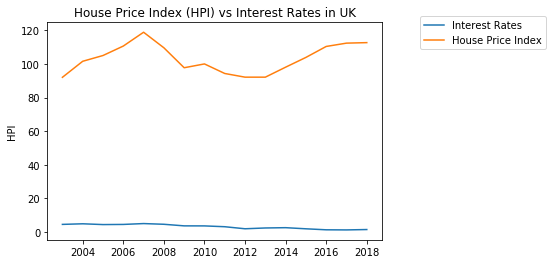

In [86]:
UK_int_rates = int_rates.groupby('Date')['United Kingdom'].mean()

plt.plot(UK_int_rates, label='Interest Rates') 
plt.plot(UK_house_price_indx, label='House Price Index')          
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('House Price Index (HPI) vs Interest Rates in UK')
plt.show()

One way to avoid this is to plot the data with two different y-axis. This way, we are to see the data represented in its own scale. This will allow us a more clear interpretation of how data moves throughout time and how to interpret it.

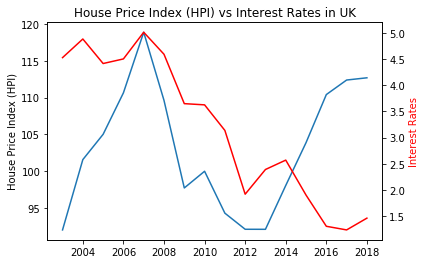

In [89]:
# interest_rates in UK
UK_int_rates = int_rates.groupby('Date')['United Kingdom'].mean()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(UK_house_price_indx)
ax1.set_ylabel('House Price Index (HPI)')

ax2 = ax1.twinx()
ax2.plot(UK_int_rates, 'r-')
ax2.set_ylabel('Interest Rates', color='r')

plt.title('House Price Index (HPI) vs Interest Rates in UK')
plt.show()


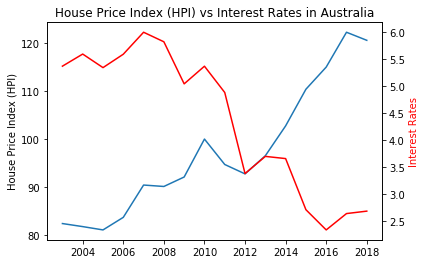

In [90]:
# interest_rates in AU
AU_int_rates = int_rates.groupby('Date')['Australia'].mean()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(AU_house_price_indx)
ax1.set_ylabel('House Price Index (HPI)')

ax2 = ax1.twinx()
ax2.plot(AU_int_rates, 'r-')
ax2.set_ylabel('Interest Rates', color='r')
plt.title('House Price Index (HPI) vs Interest Rates in Australia')
plt.show()

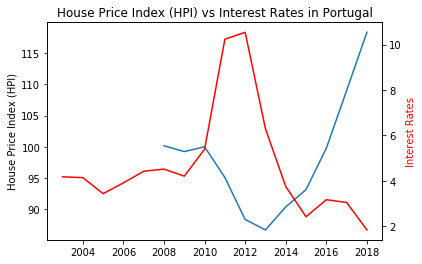

In [105]:
# interest_rates in a general country
country = 'Portugal'
ctr_int_rates = int_rates.groupby('Date')[country].mean()
ctr_house_price_indx = data.groupby('Date')[country].mean()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ctr_house_price_indx)
ax1.set_ylabel('House Price Index (HPI)')

ax2 = ax1.twinx()
ax2.plot(ctr_int_rates, 'r-')
ax2.set_ylabel('Interest Rates', color='r')
plt.title('House Price Index (HPI) vs Interest Rates in ' + country)
plt.show()